Peak (4s): -10.33945263846423 dB.


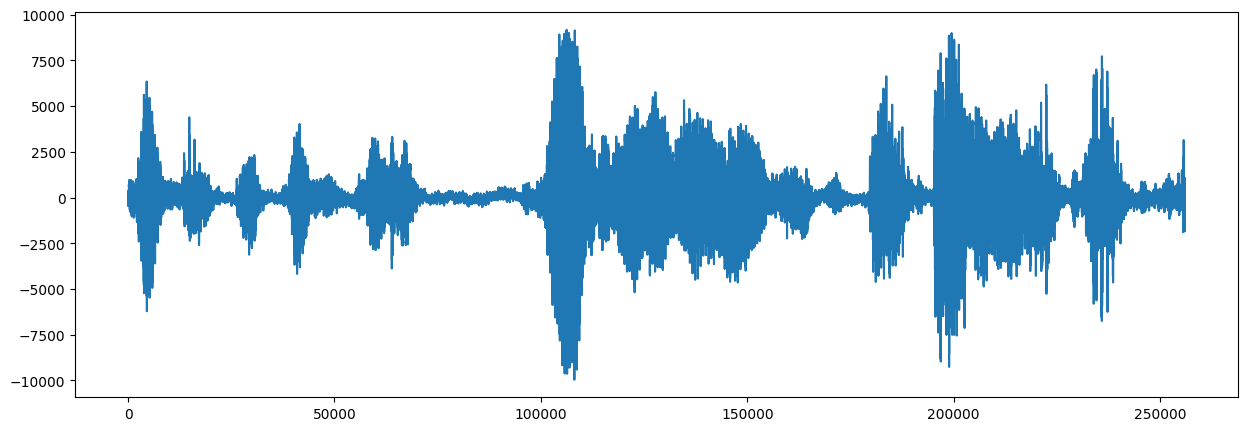

Peak (4s): -10.345556260405544 dB.


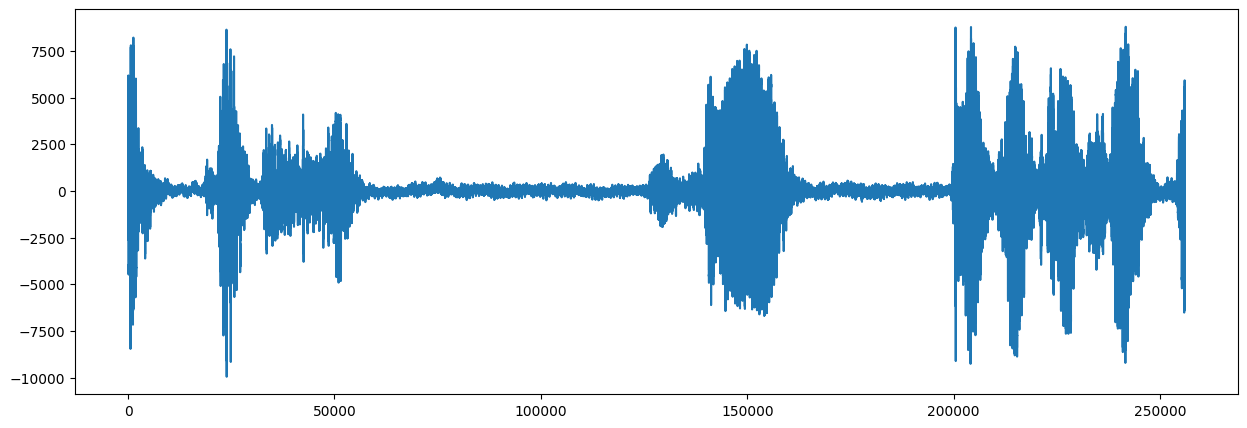

Peak (4s): -10.368264481543823 dB.


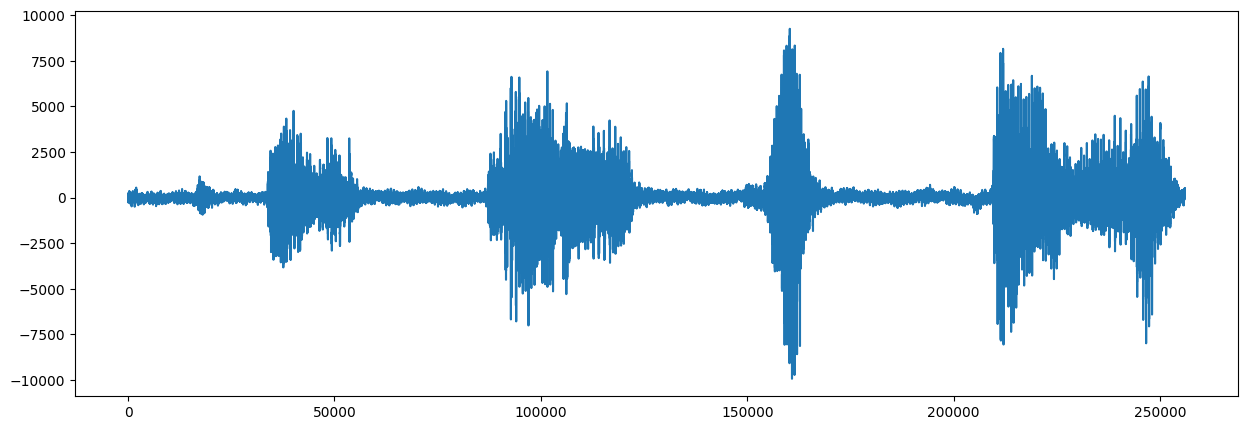

Peak (4s): -11.18370864522885 dB.


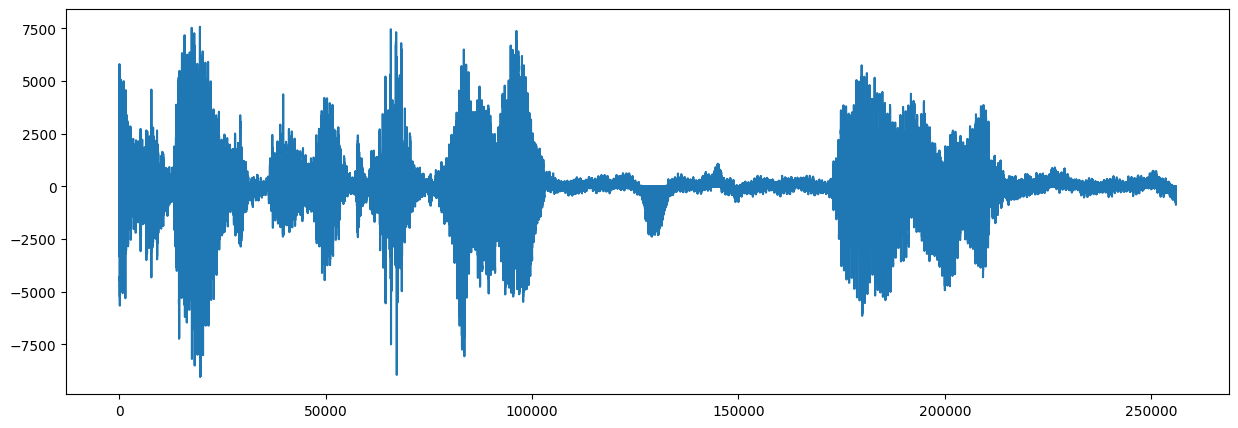

Peak (4s): -12.44375298143453 dB.


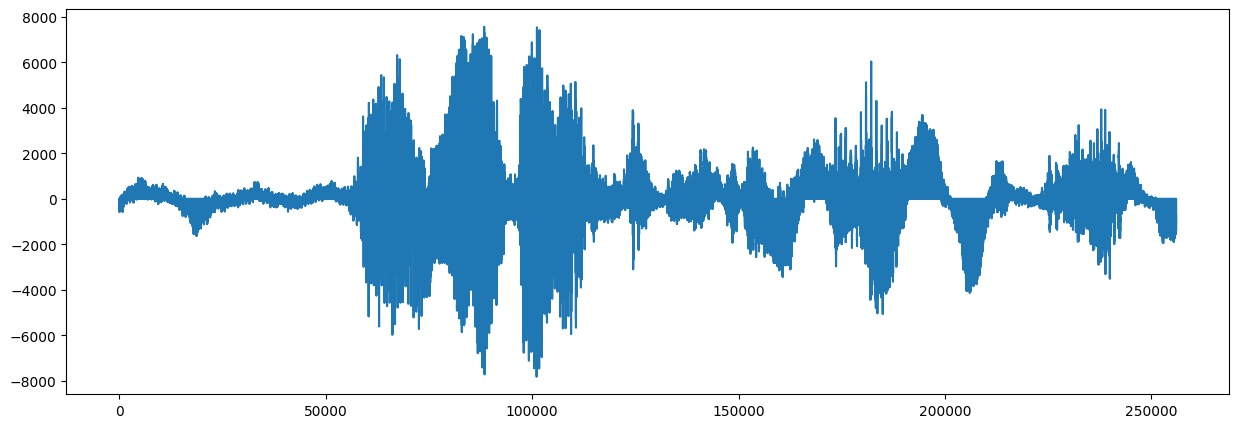

Peak (4s): -13.08309082866044 dB.


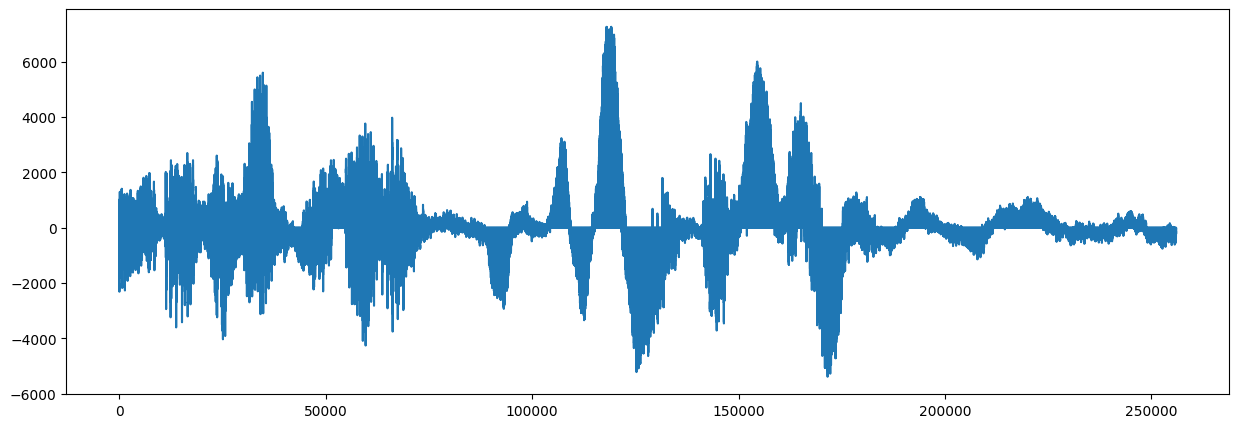

Peak (4s): -5.543559140677814 dB.


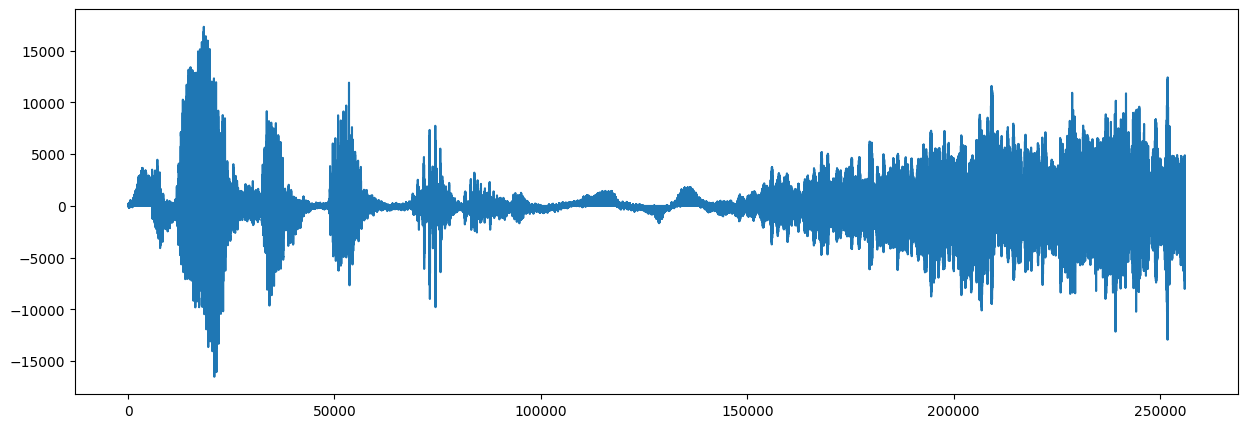

Peak (4s): -2.1333488111114858 dB.


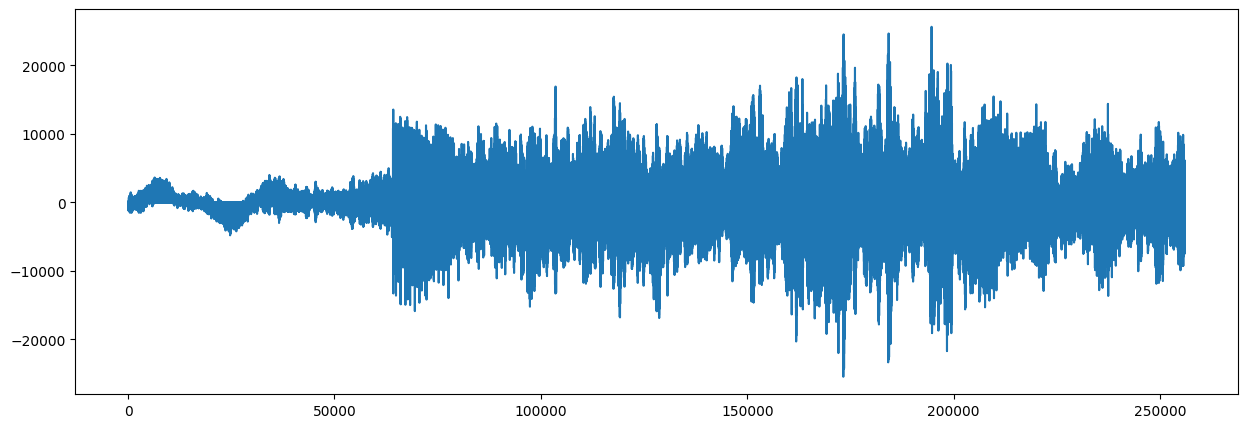

Peak (4s): -5.118554554870513 dB.


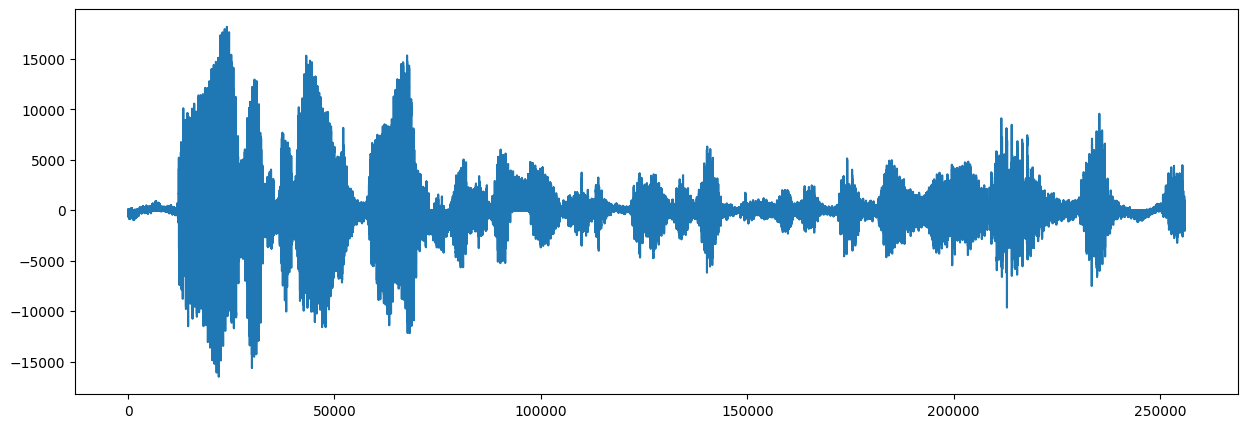

Peak (4s): -10.529797291387597 dB.


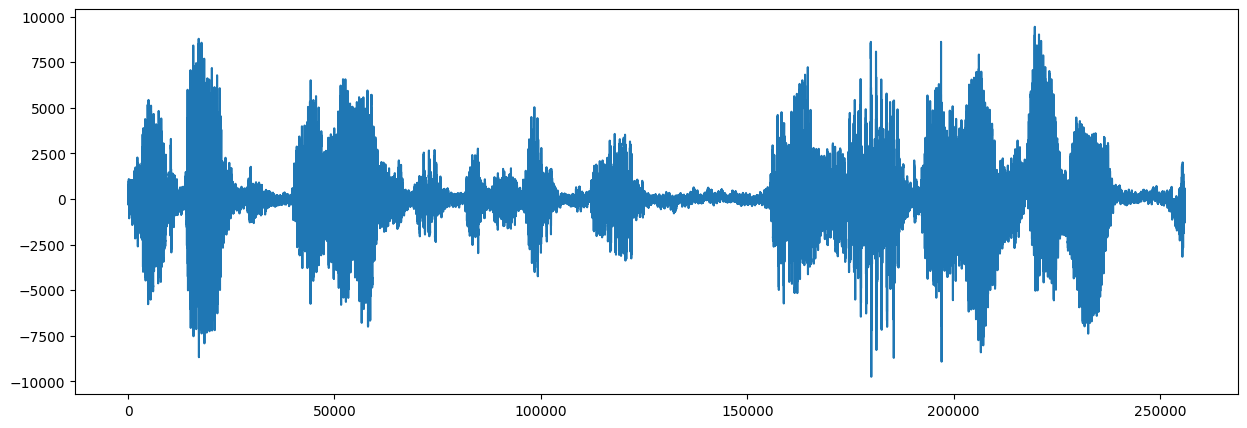

Peak (4s): -4.326701027183622 dB.


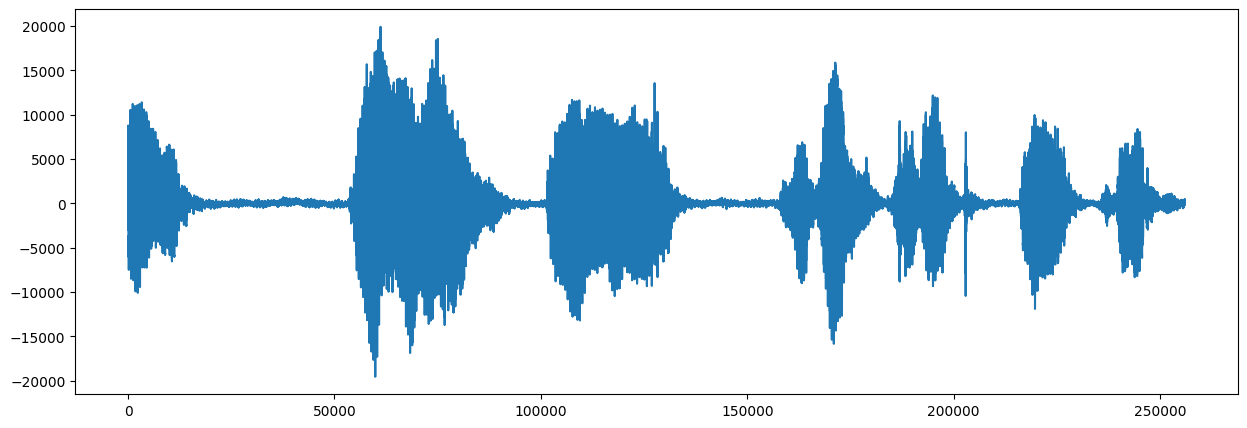

Peak (4s): -6.282148846240202 dB.


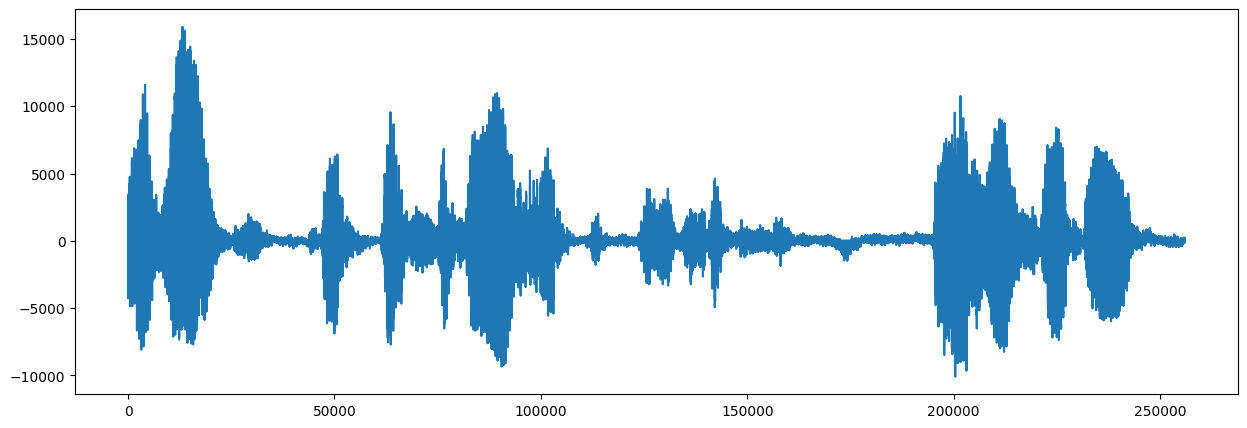

Peak (4s): -4.816606317369596 dB.


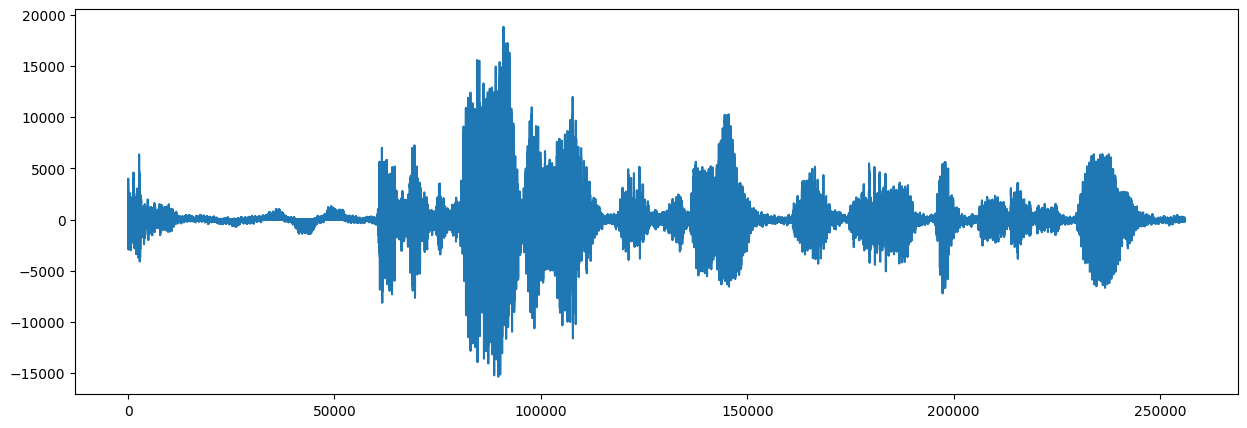

Peak (4s): -8.164120747614868 dB.


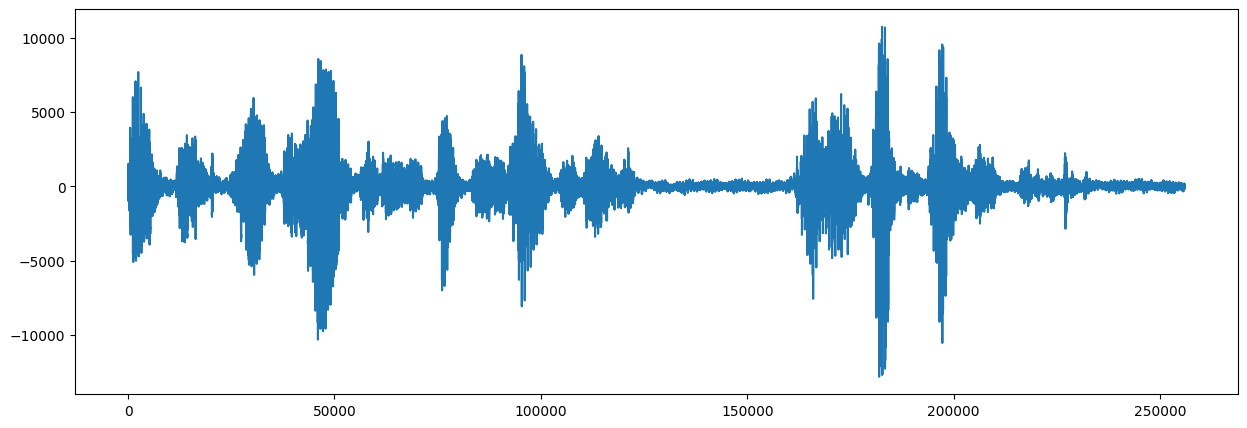

Peak (4s): -6.330361300550177 dB.


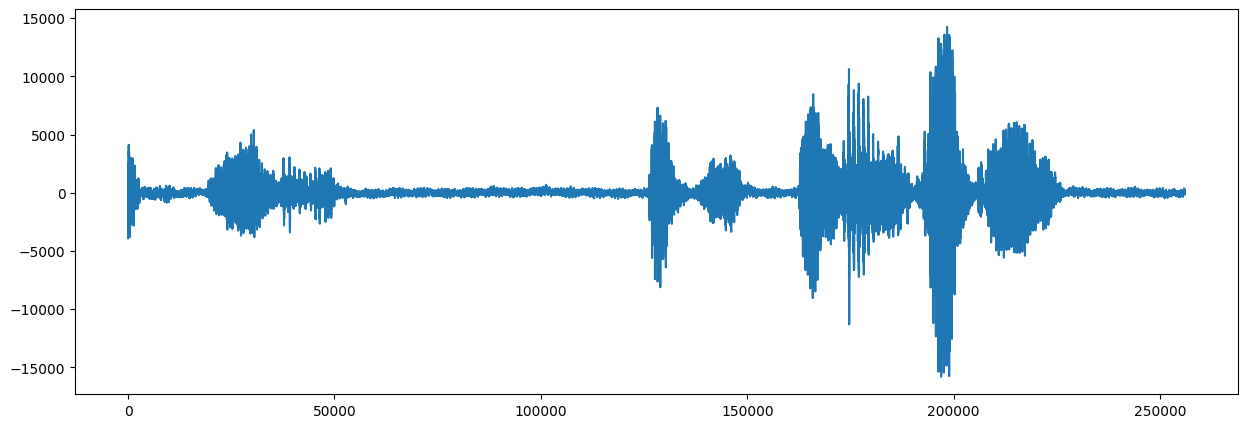

Peak (4s): -10.50222160344233 dB.


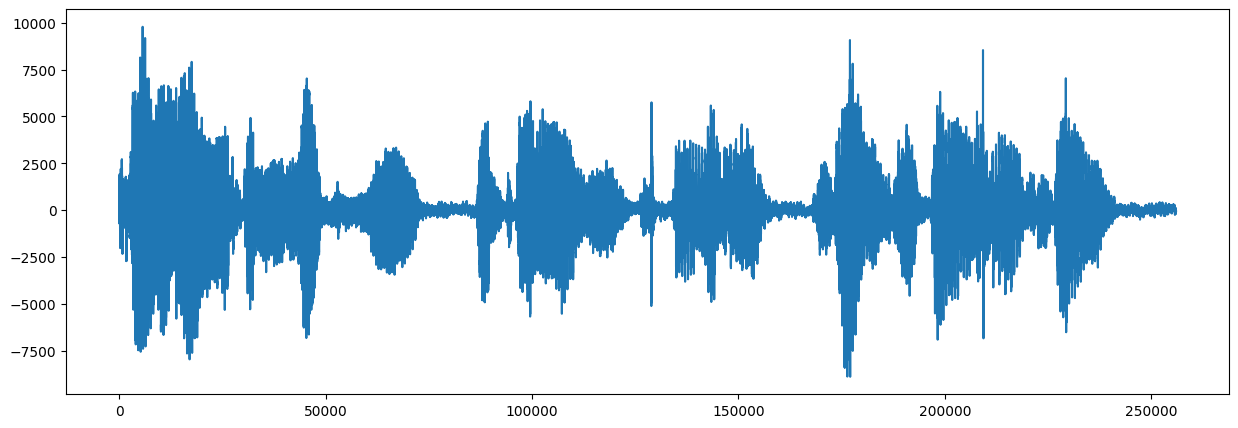

Peak (4s): -7.403827159882175 dB.


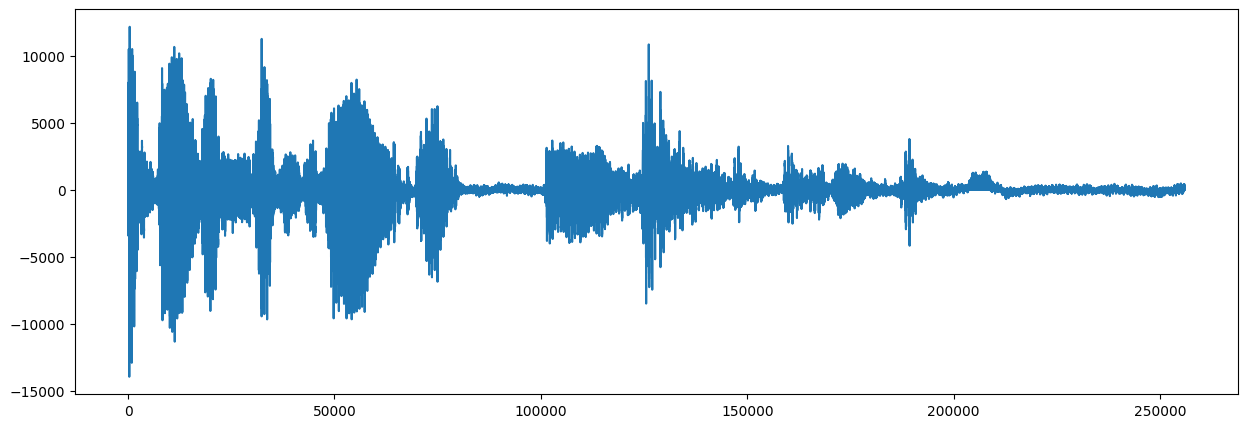

Peak (4s): -8.591775223425351 dB.


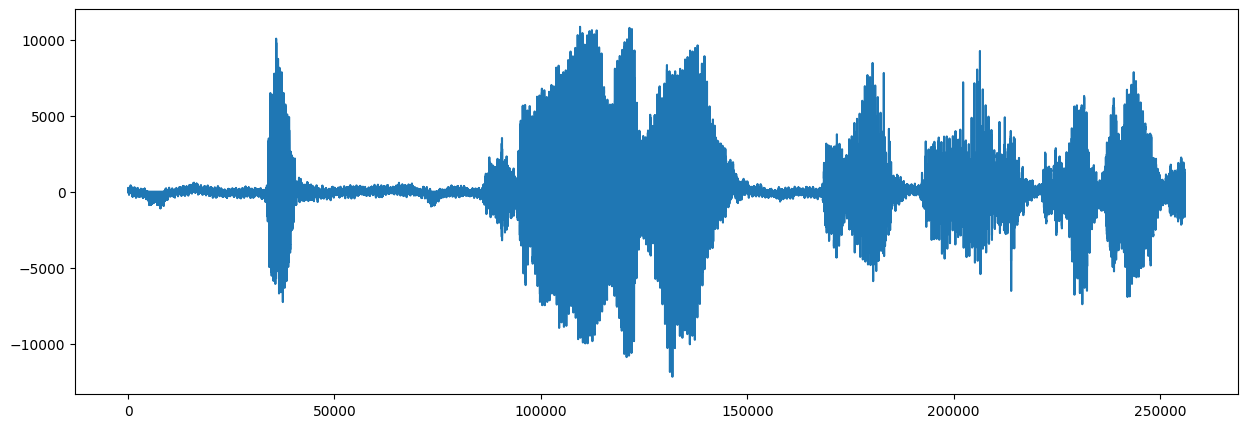

Peak (4s): -8.515841066763771 dB.


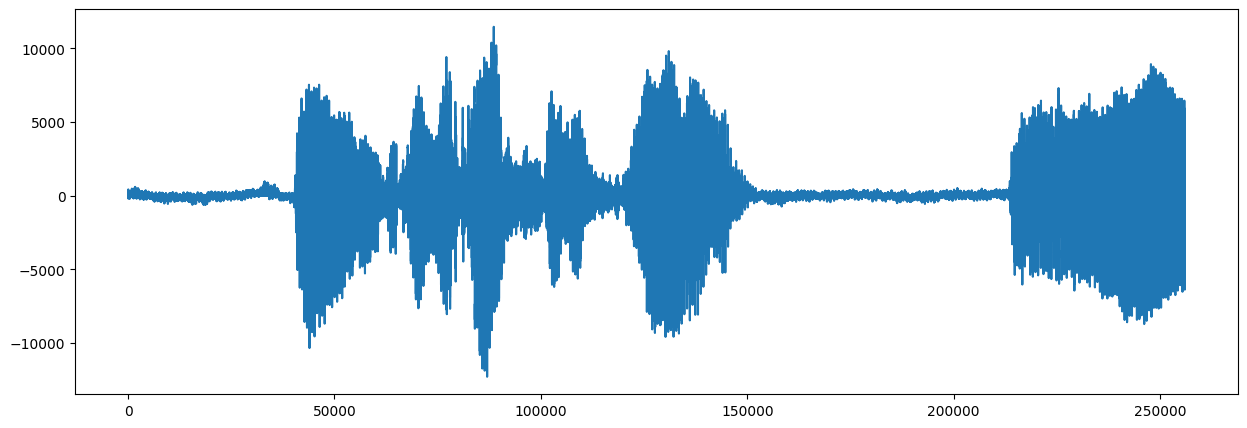

Peak (4s): -7.249174498421977 dB.


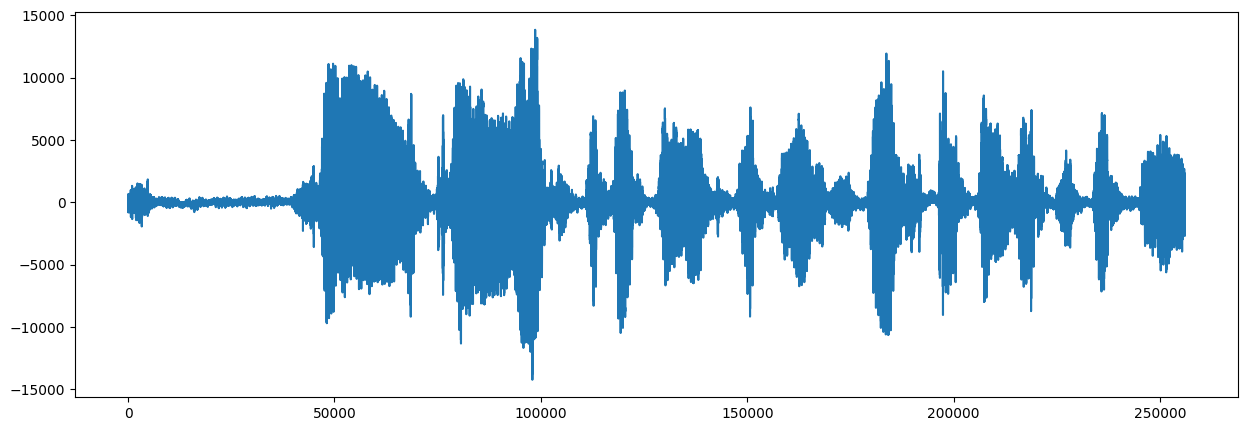

Peak (4s): -10.465884478342023 dB.


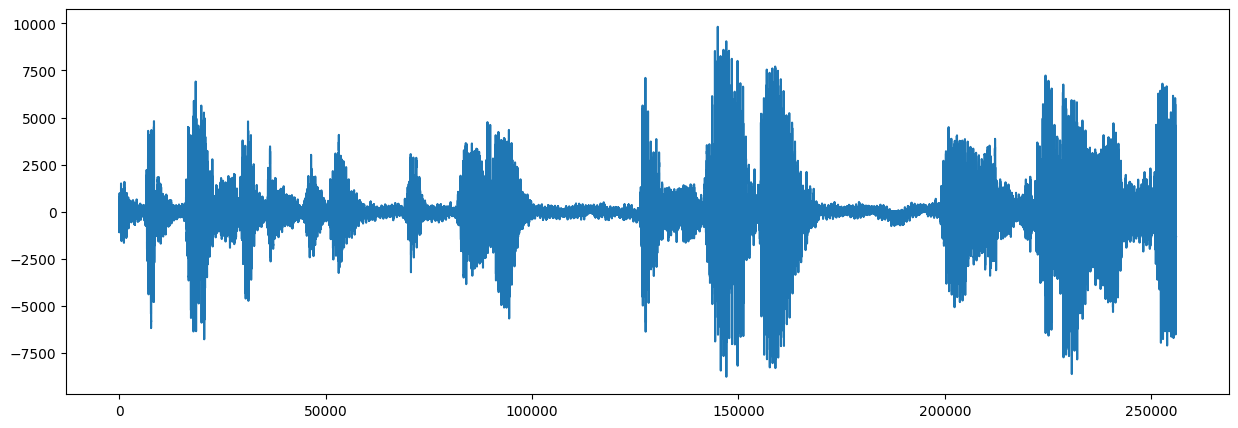

Peak (4s): -8.154626488789102 dB.


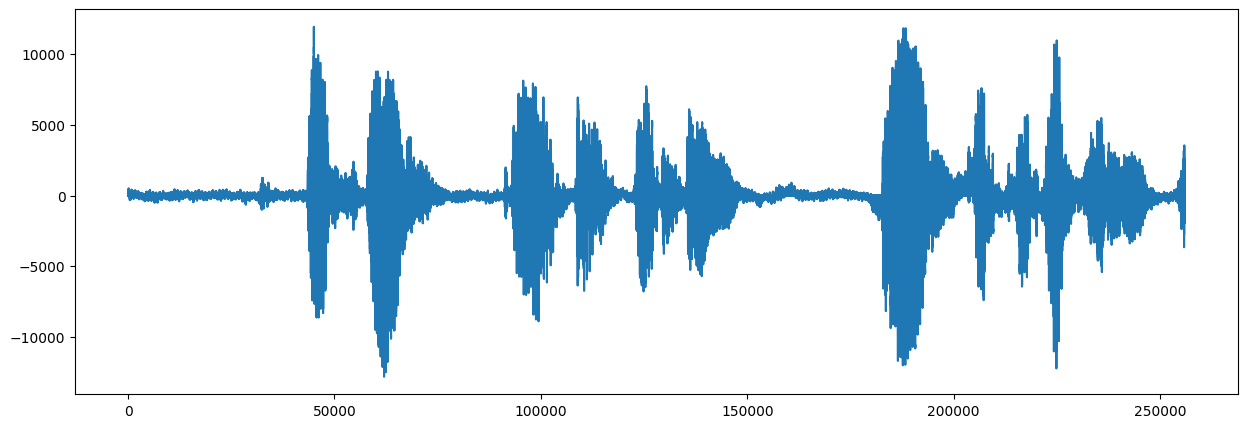

Peak (4s): -6.6248264369643035 dB.


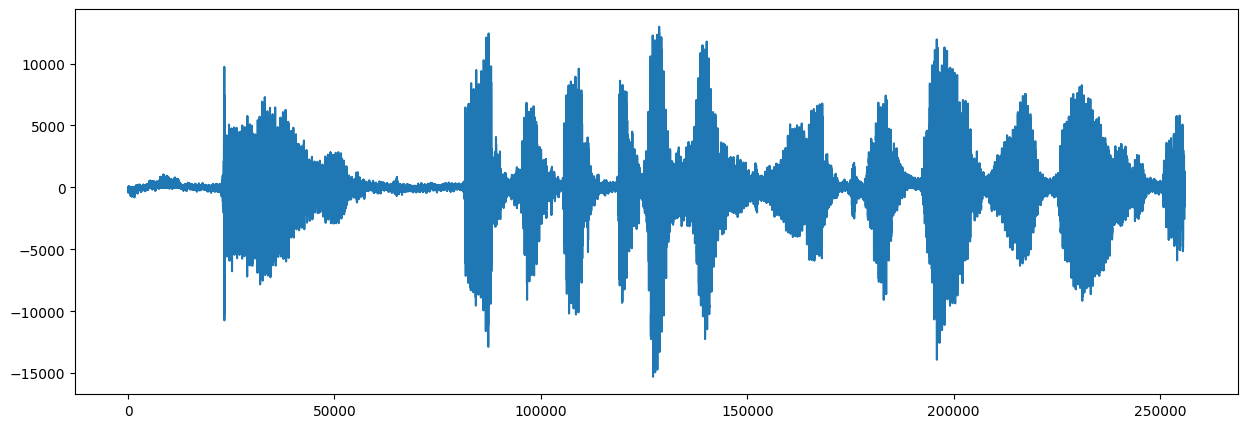

Peak (4s): -4.425849083800531 dB.


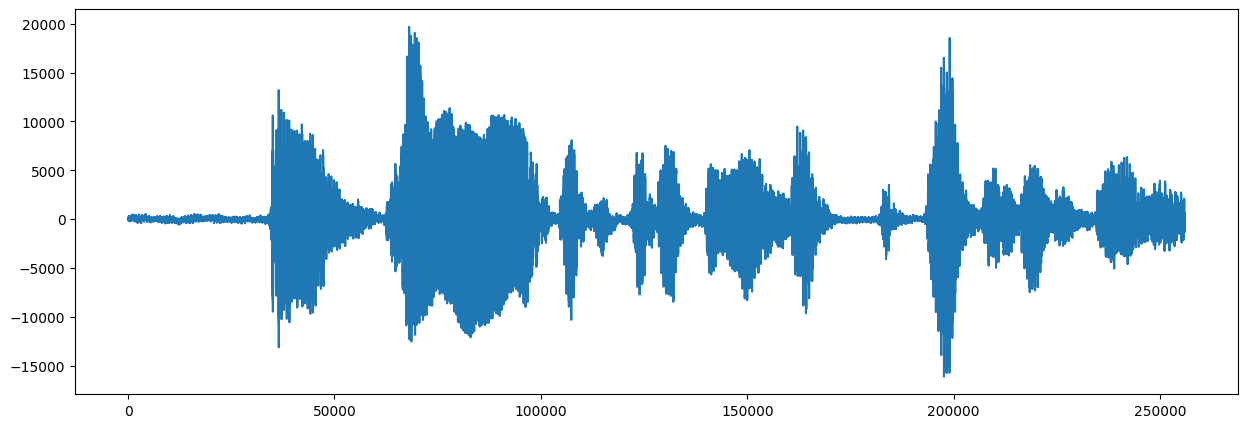

Peak (4s): -6.274503296866775 dB.


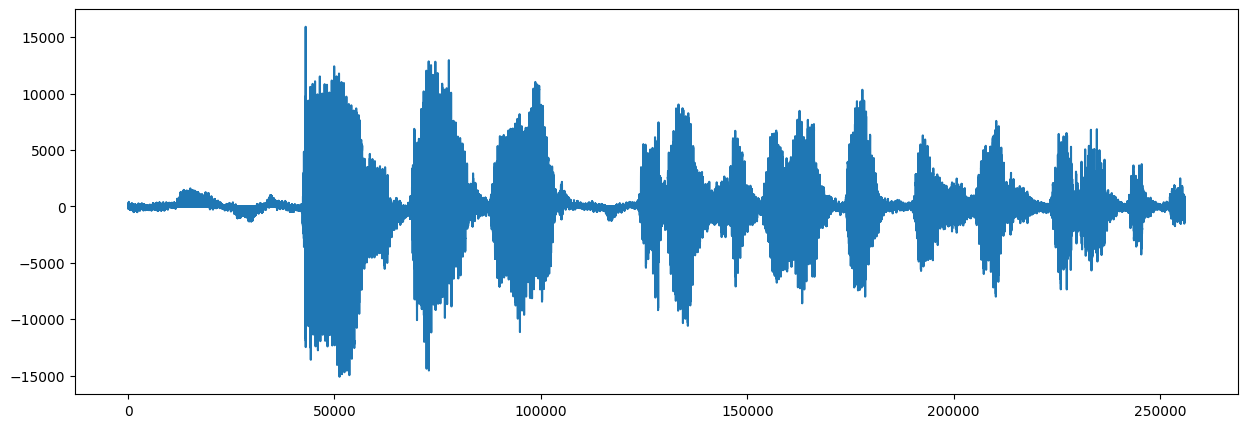

Peak (4s): -4.697431291832832 dB.


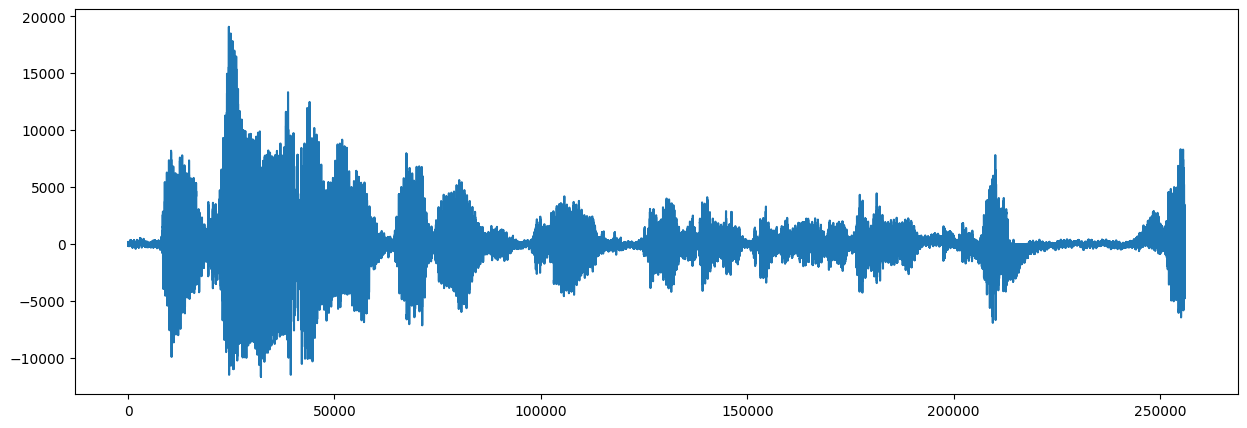

Peak (4s): -0.05077694224596994 dB.


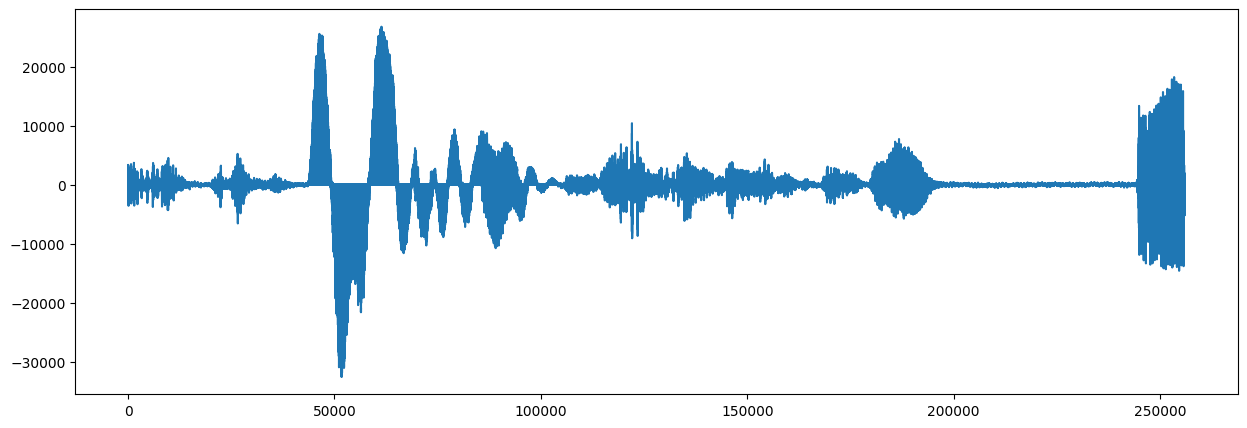

Peak (4s): -4.511425043386032 dB.


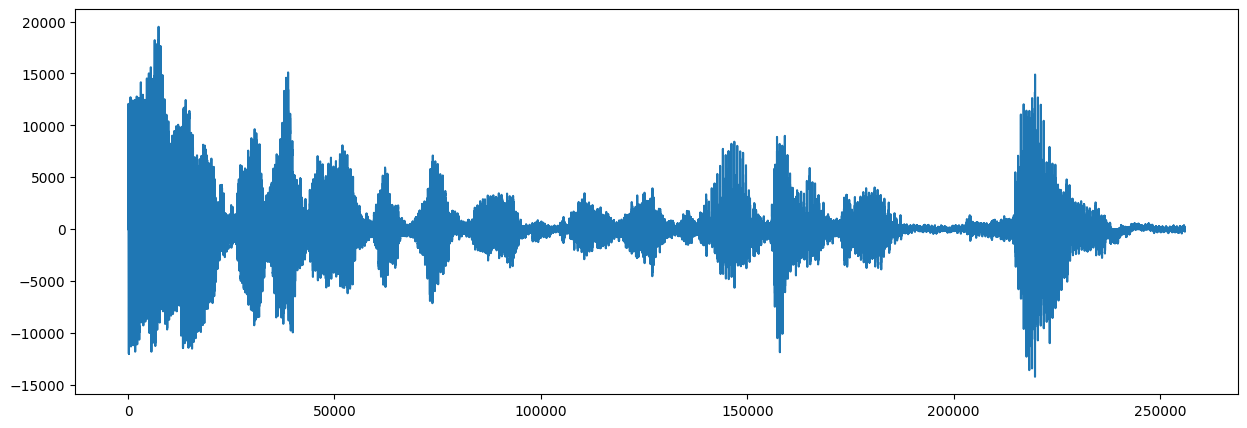

Peak (4s): -2.405617202645938 dB.


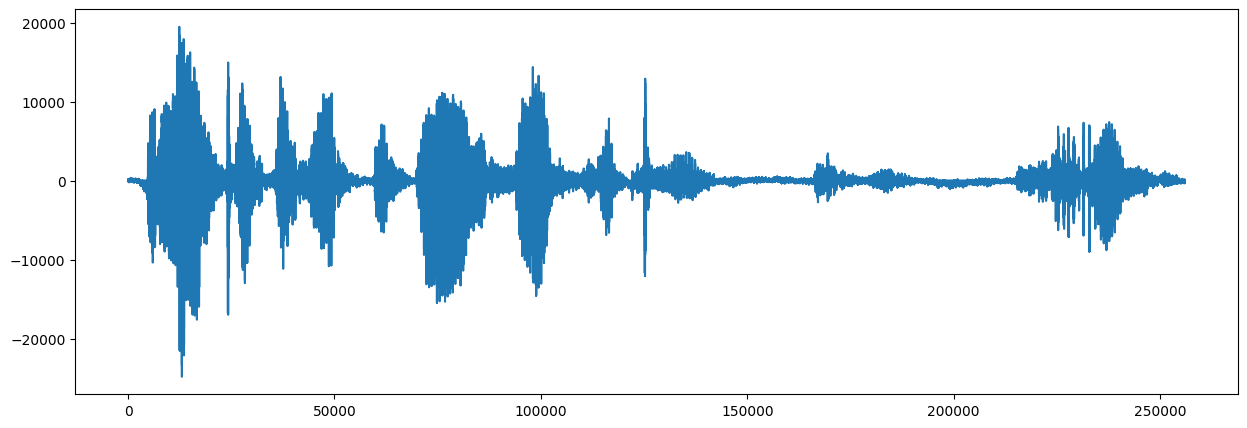

Peak (4s): -10.193380700101311 dB.


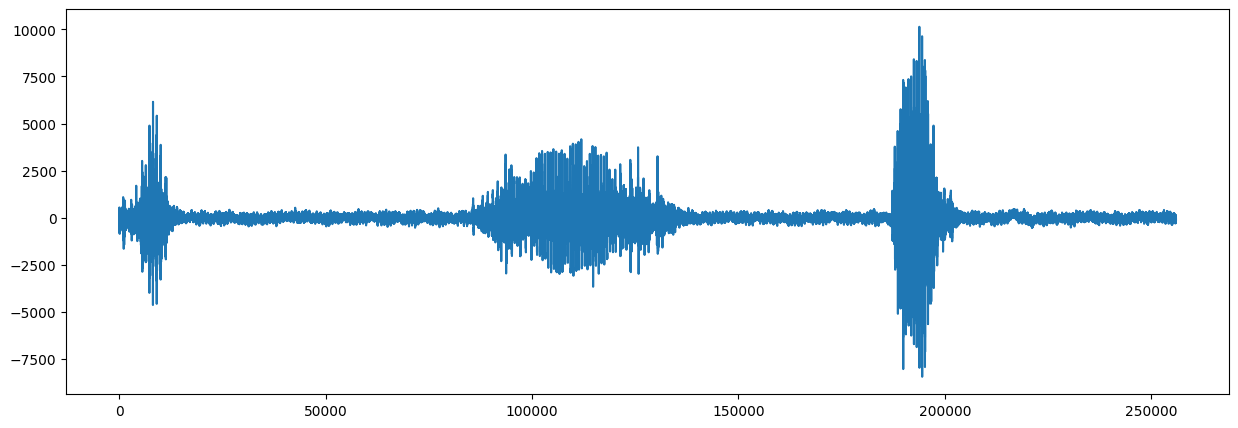

Peak (4s): -8.097877844086732 dB.


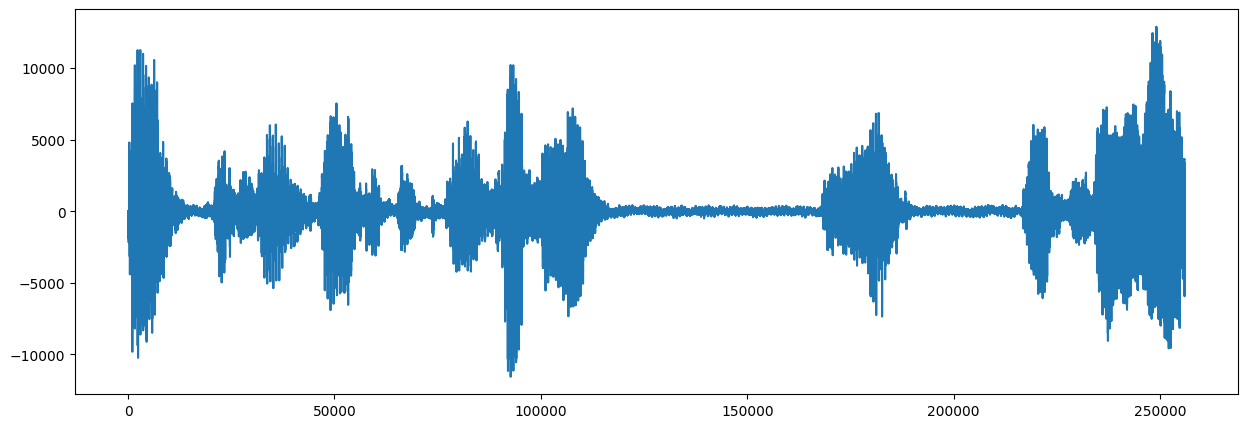

Peak (4s): -3.0003622493859567 dB.


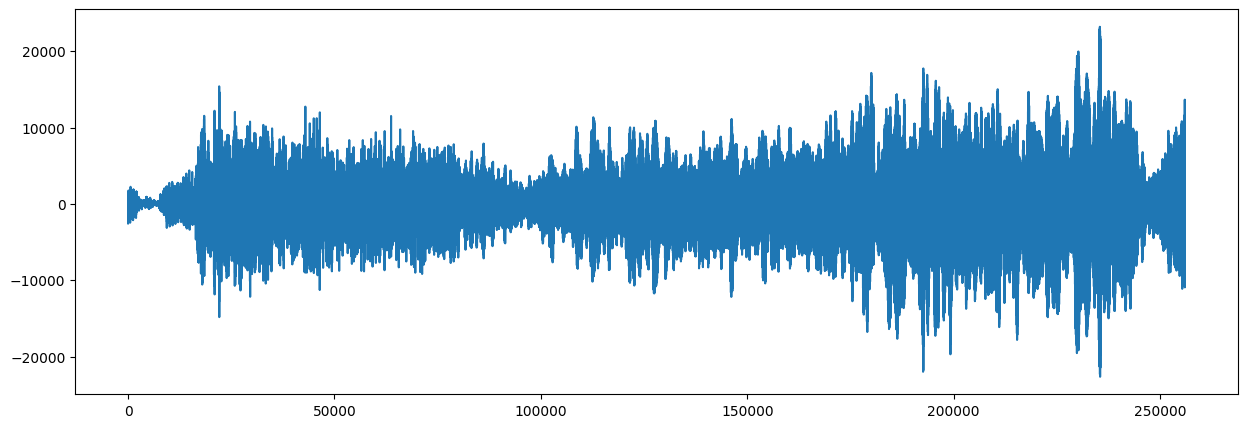

Peak (4s): -3.9858161370349925 dB.


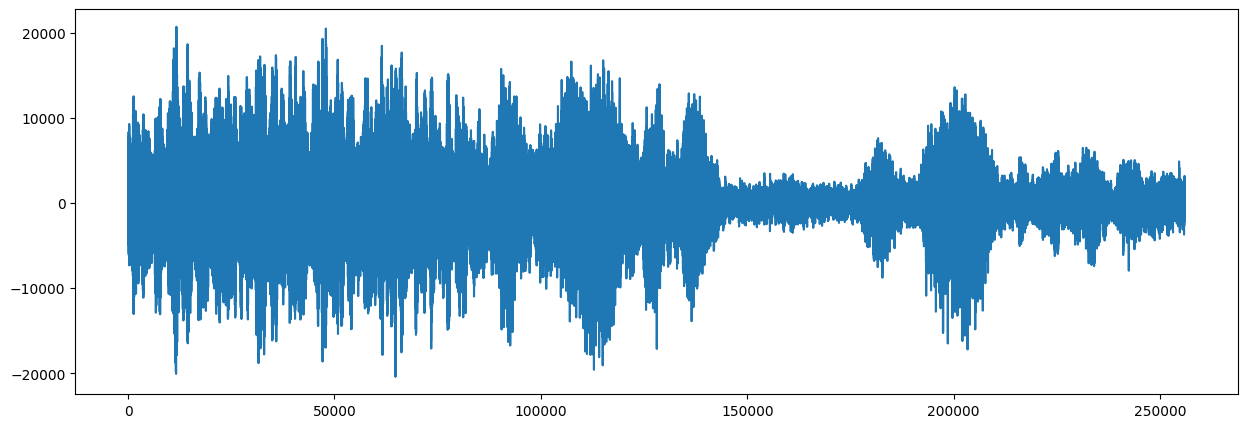

Peak (4s): -16.52104544276871 dB.


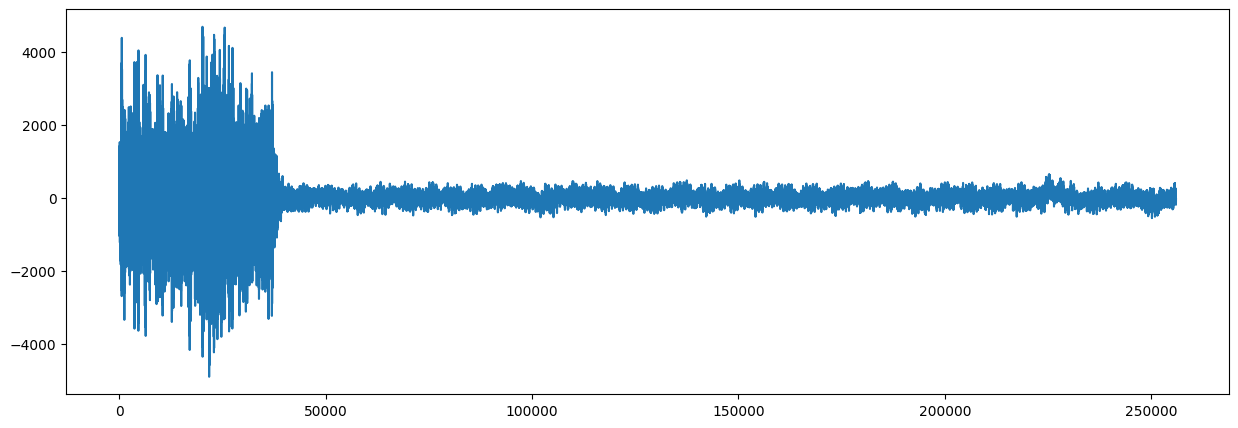

Peak (4s): -7.5277971262083305 dB.


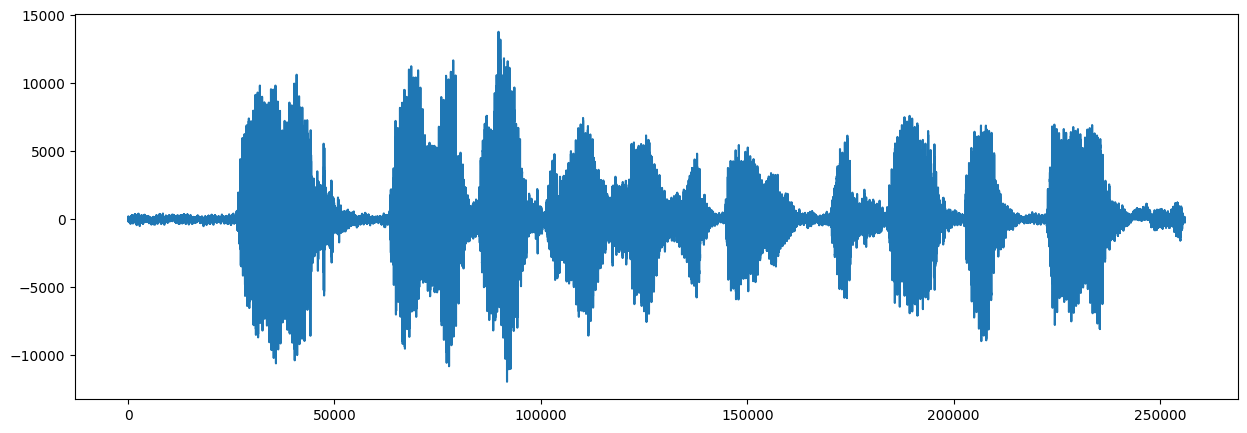

Peak (4s): -10.210539713263845 dB.


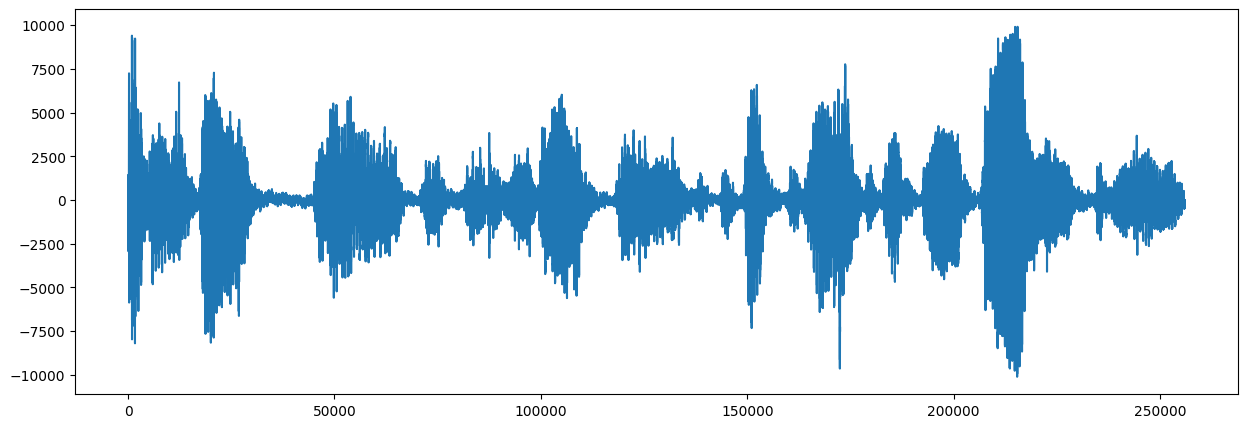

Peak (4s): -9.886039984774463 dB.


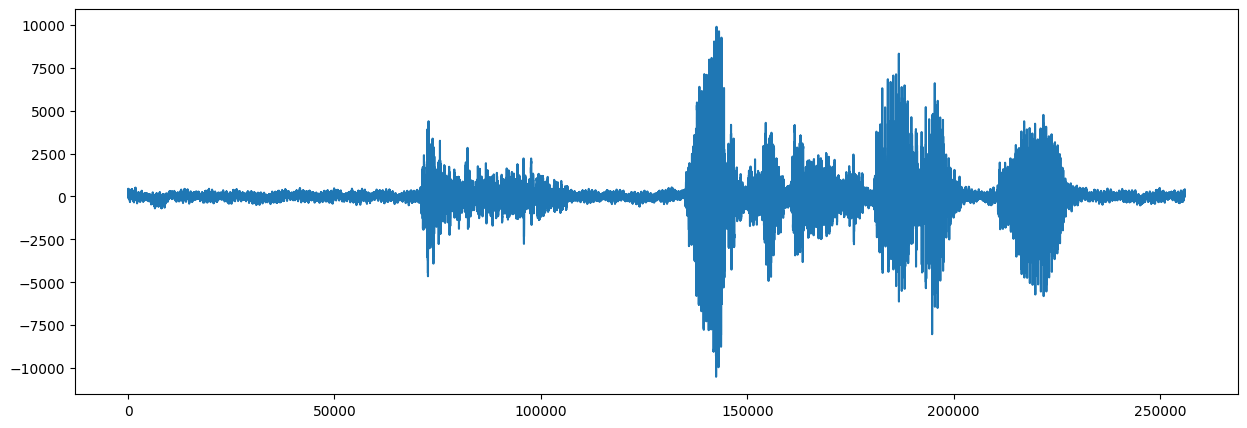

Peak (4s): -12.13608192105209 dB.


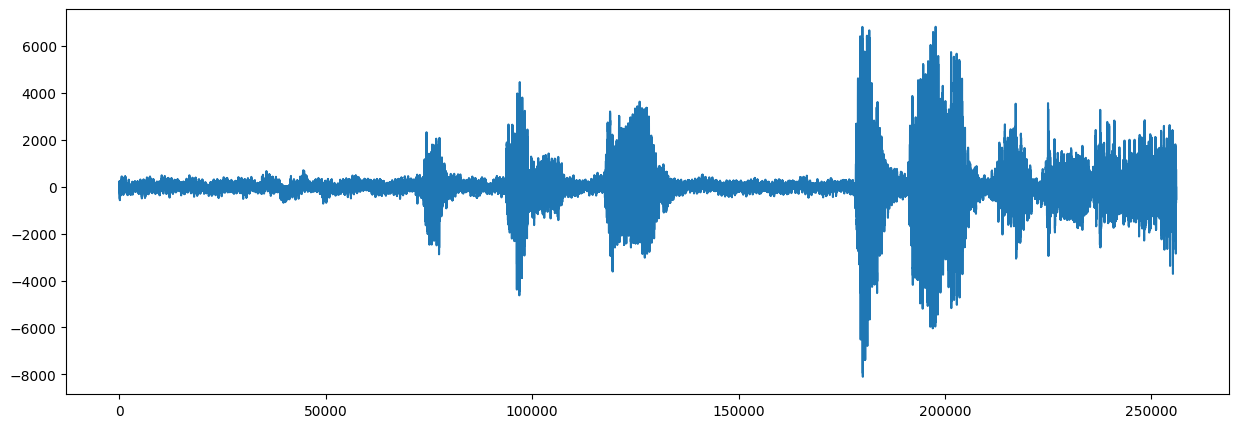

Peak (4s): -11.820311428329743 dB.


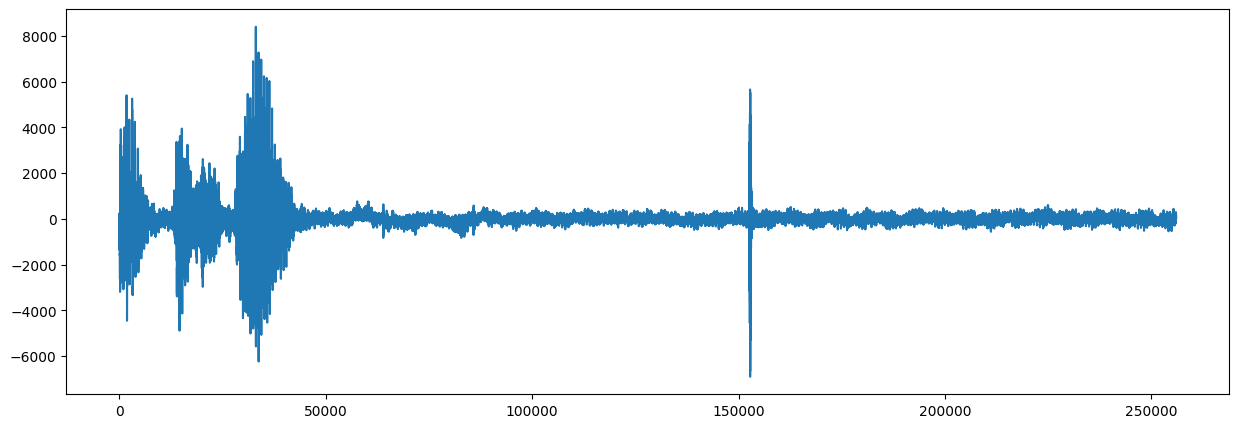

Peak (4s): -30.001803591010074 dB.


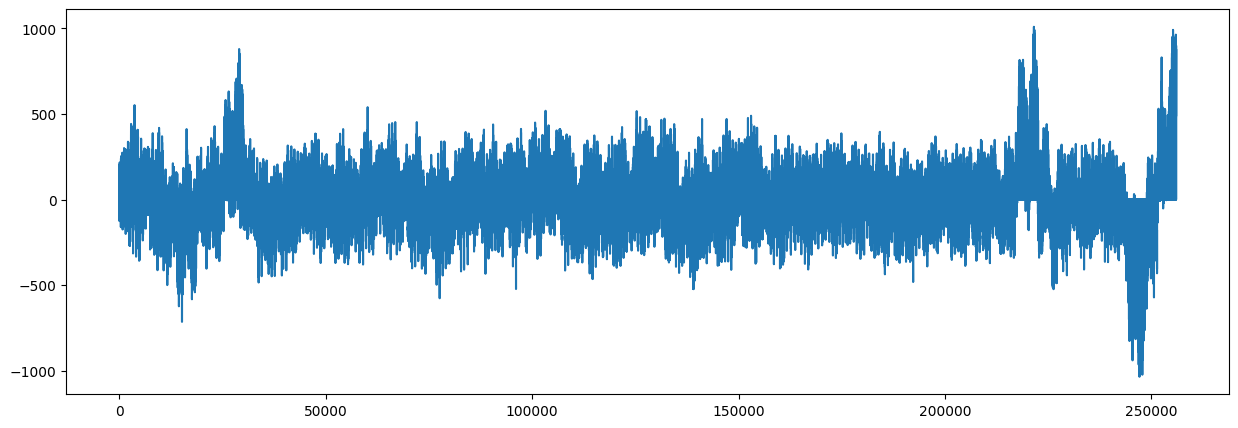

KeyboardInterrupt: 

In [2]:
import sounddevice as sd
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import numpy as np
from datetime import datetime

DURATION = 4 # Duration of recording
SAMPLING_RATE = 16000      

while(True):
    # Record audio
    recording = sd.rec(int(DURATION * SAMPLING_RATE), samplerate=SAMPLING_RATE, channels=2)
    sd.wait()  # Wait until recording is finished
    
    timestamp = datetime.now()
    fname = timestamp.strftime('%Y%m%d%H%M%S')
    audio_path = f'data/m3_demo/{fname}.wav'
    write(audio_path, SAMPLING_RATE, recording)

    # Convert to pydub audio segment
    audio_segment = AudioSegment.from_wav(audio_path)

    # Calculate dBFS (dBFS is dB relative to the maximum possible loudness)
    max_loudness = audio_segment.max_dBFS
    average_loudness = audio_segment.dBFS

    print("Peak ({}s):".format(DURATION), max_loudness, "dB.")

    # Converting audio segment to numpy array
    channel1 = np.frombuffer(audio_segment.raw_data, np.int16)
    
    # Plotting the signal
    plt.figure(figsize=(15, 5))
    plt.plot(channel1)
    plt.show()